In [2]:
#based on some weather parameters it will predict whether it will rain or not
#we use classification model here

import pandas
dt = pandas.read_csv('Rainfall_data.csv')
dt

,Index,Temperature,Humidity%,Rain
0,0,34,74.2,Yes
1,1,19,68.2,No
2,2,28,67.2,Yes
3,3,29,66.6,Yes
4,4,26,57.9,Yes
...,...,...,...,...
19995,19995,30,77.9,Yes
19996,19996,20,74.8,Yes
19997,19997,14,69.4,No
19998,19998,20,60.6,No


In [3]:
from sklearn.model_selection import train_test_split
inp = dt.drop(columns= ['Index','Rain']) #setting input and dropping remaining column
out = dt['Rain'] # selecting outputs

#preparing testing model
inp_y,tst_x,out_y,tst_y = train_test_split(inp,out, test_size = 0.05)

In [10]:
#here we use classification algo
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(inp,out)

DecisionTreeClassifier()

In [11]:
#check model and get output(use 2d array as 2 inputs are there)
model.predict([[27,41],
              [25,80]])

array(['Yes', 'Yes'], dtype=object)

In [12]:
pred_y = model.predict(tst_x)

In [13]:
cmp = pandas.DataFrame({'Actual Values': tst_y.values,
                       'Predicted Values': pred_y.flatten()})
cmp

,Actual Values,Predicted Values
0,Yes,No
1,Yes,Yes
2,No,No
3,Yes,Yes
4,No,No
...,...,...
995,Yes,Yes
996,No,No
997,No,No
998,Yes,Yes


In [14]:
from sklearn.preprocessing import LabelEncoder
RainEnc = LabelEncoder()
RainEnc.fit(['Yes','No'])

LabelEncoder()

In [15]:
cmp['Actual Values'] = RainEnc.transform(cmp['Actual Values'])
cmp['Predicated Values'] = RainEnc.transform(cmp['Predicted Values'])

<AxesSubplot:ylabel='Density'>

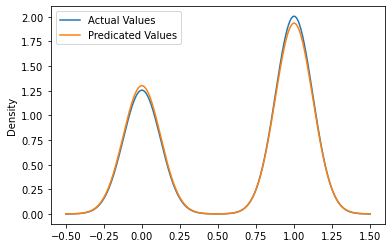

In [16]:
cmp.plot(kind = 'density')

#actual and predicted values are almost close so the model is approprite 

In [17]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(tst_y,pred_y)*100
print('Accuricy of the mdoel:',acc,'%')

Accuricy of the mdoel: 95.5 %
